# Visualizing Honey Production 🍯 🐝

Continuing with the nature focus of our research, let's discover interesting visualizations to show the relationships between various types of honey, according to a dataset derived from the United States Department of Agriculture.

This dataset of about 600 items displays honey production in many U.S. states. So, for example, you can look at the number of colonies, yield per colony, total production, stocks, price per pound, and value of the honey produced in a given state from 1998-2012, with one row per year for each state.

It will be interesting to visualize the relationship between a given state's production per year and, for example, the price of honey in that state. Alternately, you could visualize the relationship between states' honey yield per colony. This year span covers the devastating 'CCD' or 'Colony Collapse Disorder' first seen in 2006 (http://npic.orst.edu/envir/ccd.html), so it is a poignant dataset to study. 🐝

## Scatterplots

Use a scatterplot to show how the price of honey has evolved, year over year, per state. Seaborn, using relplot, conveniently groups the state data and displays data points for both categorical and numeric data.

Let's start by importing the data and Seaborn:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
honey = pd.read_csv('../data/honey.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


You notice that the honey data has several interesting columns, including year and price per pound. Let's explore this data, grouped by U.S. state:

In [4]:
honey_by_state = honey.groupby(['state']).head()
honey_by_state

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
213,WA,50000.0,51,2550000.0,561000.0,1.27,3239000.0,2002
214,WV,9000.0,51,459000.0,151000.0,1.32,606000.0,2002
215,WI,70000.0,95,6650000.0,2461000.0,1.34,8911000.0,2002
216,WY,38000.0,63,2394000.0,383000.0,1.33,3184000.0,2002


Create a basic scatterplot to show the relationship between the price per pound of honey and its U.S. state of origin. Make the y axis tall enough to display all the states:

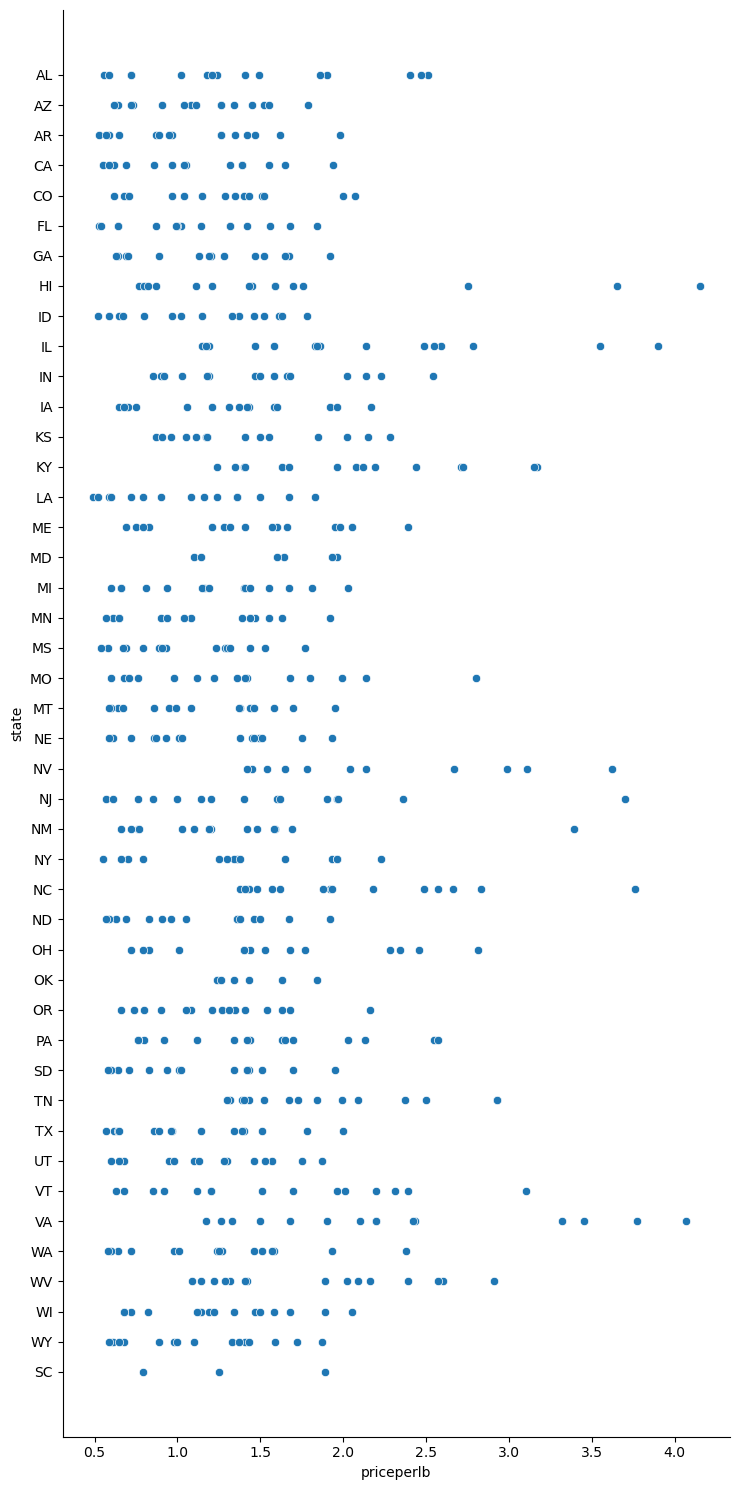

In [5]:
sns.relplot(x='priceperlb',y='state',data=honey,height=15,aspect=0.5)

Now, show the same data with a honey color scheme to show how the price evolves over the years. You can do this by adding a 'hue' parameter to show the change, year over year:



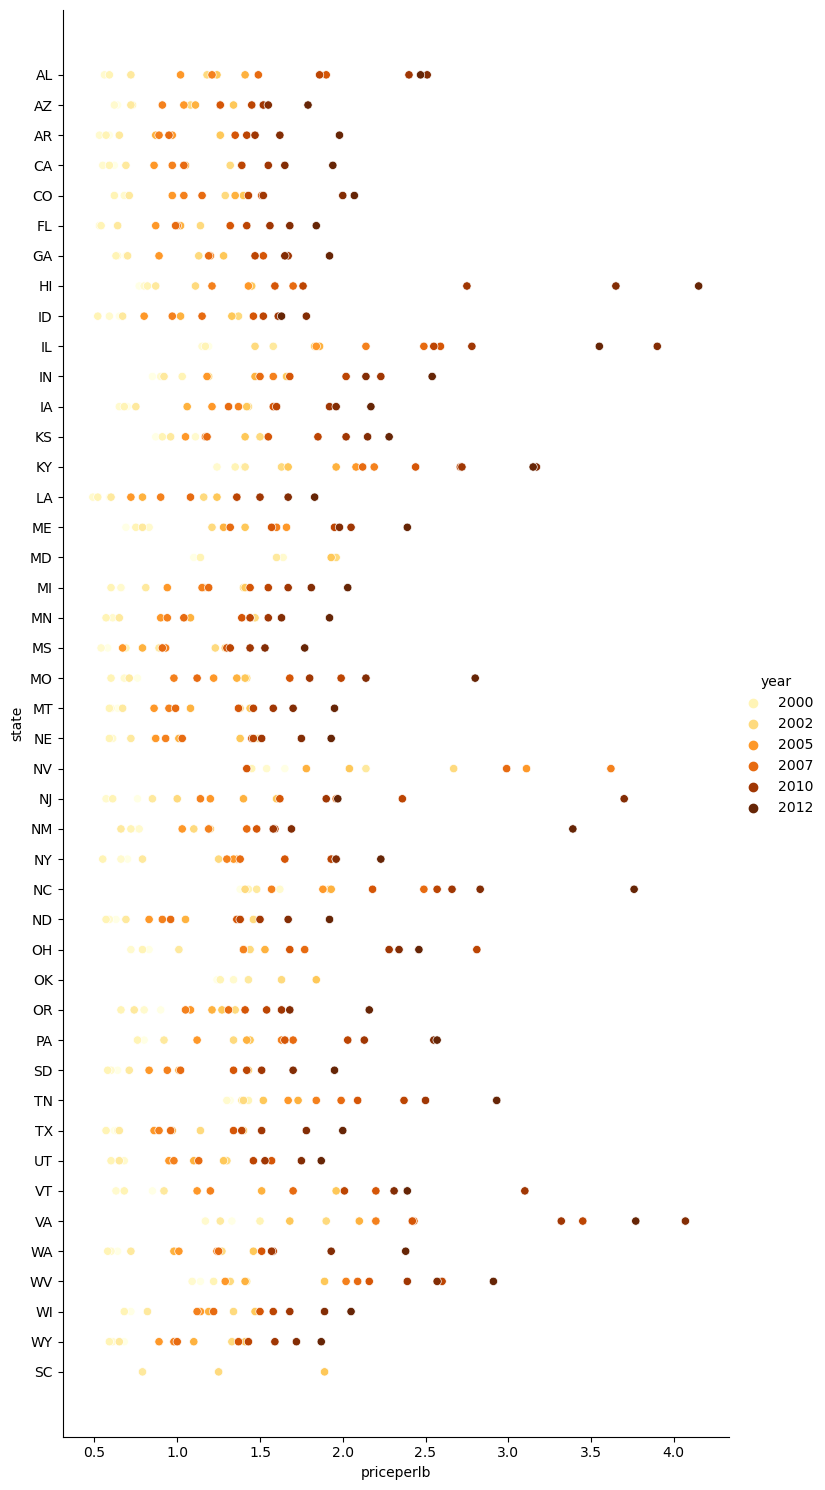

In [6]:
sns.relplot(x="priceperlb", y="state", hue="year", palette="YlOrBr", data=honey, height=15, aspect=.5);

With this color scheme change, you can see that there's obviously a strong progression over the years in terms of honey price per pound. Indeed, if you look at a sample set in the data to verify (pick a given state, Arizona for example) you can see a pattern of price increases year over year, with few exceptions:

In [7]:
honey[honey['state'] == 'AZ']

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
44,AZ,52000.0,62,3224000.0,1548000.0,0.62,1999000.0,1999
87,AZ,40000.0,59,2360000.0,1322000.0,0.73,1723000.0,2000
130,AZ,43000.0,59,2537000.0,1142000.0,0.72,1827000.0,2001
174,AZ,38000.0,63,2394000.0,1197000.0,1.08,2586000.0,2002
218,AZ,35000.0,72,2520000.0,983000.0,1.34,3377000.0,2003
262,AZ,32000.0,55,1760000.0,774000.0,1.11,1954000.0,2004
303,AZ,36000.0,50,1800000.0,720000.0,1.04,1872000.0,2005
344,AZ,30000.0,65,1950000.0,839000.0,0.91,1775000.0,2006
385,AZ,30000.0,64,1920000.0,902000.0,1.26,2419000.0,2007


Another way to visualize this progression is to use size, rather than color. For colorblind users, this might be a better option. Edit your visualization to show an increase of price by an increase in dot circumference:

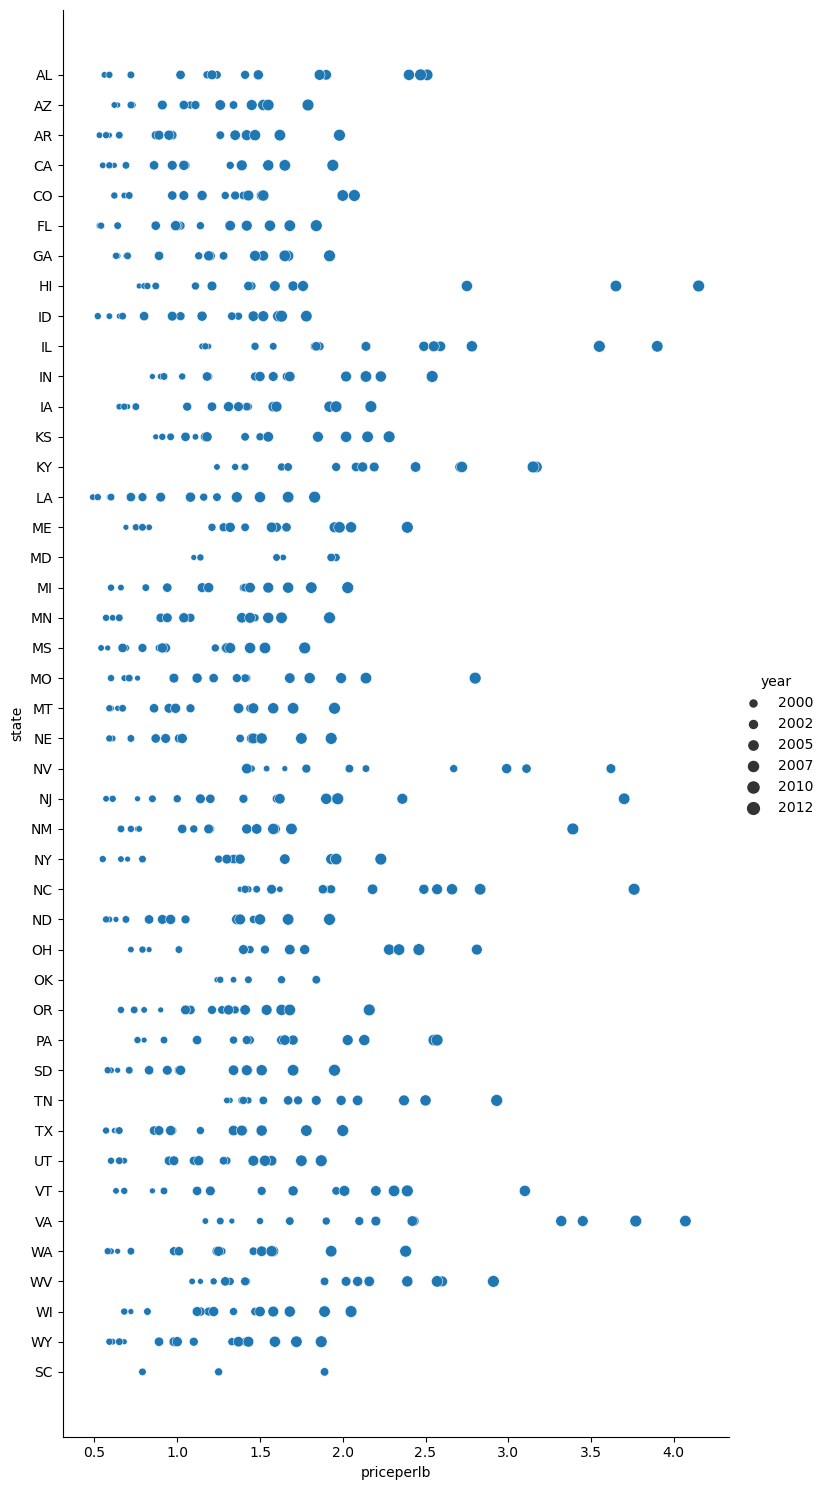

In [8]:
sns.relplot(x="priceperlb", y="state", size="year", data=honey, height=15, aspect=.5)

Is this a simple case of supply and demand? Due to factors such as climate change and colony collapse, is there less honey available for purchase year over year, and thus the price increases?

To discover a correlation between some of the variables in this dataset, let's explore some line charts.

## Line charts

Question: Is there a clear rise in price of honey per pound year over year? You can most easily discover that by creating a single line chart:

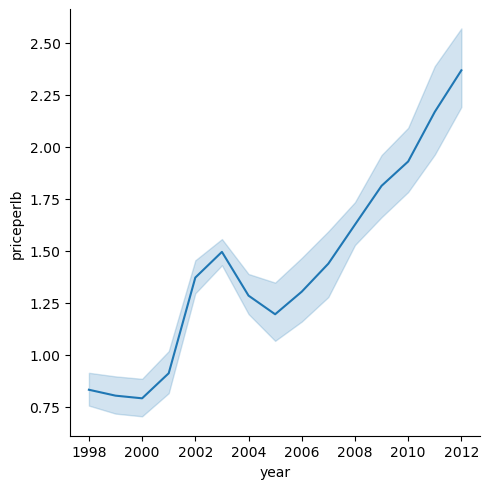

In [9]:
sns.relplot(x = 'year', y ='priceperlb', kind = 'line', data = honey)


Because Seaborn is aggregating data around one line, it displays "the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean". Source. This time-consuming behavior can be disabled by adding ci=None.


Question: Well, in 2003 can we also see a spike in the honey supply? What if you look at total production year over year?

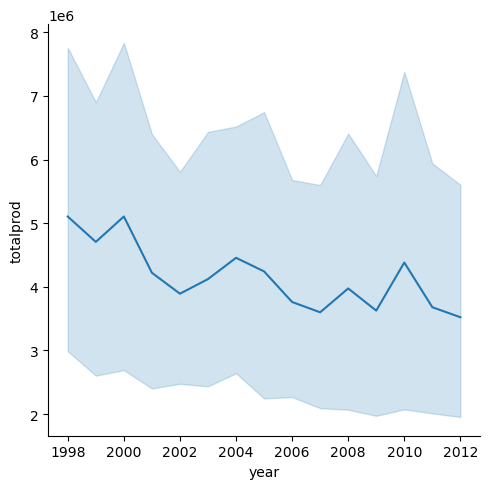

In [10]:
sns.relplot(x="year", y="totalprod", kind="line", data=honey)

Answer: Yes, with some exceptions around the year 2003:

Because Seaborn is aggregating data around one line, it displays "the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean". Source. This time-consuming behavior can be disabled by adding ci=None.

Question: Well, in 2003 can we also see a spike in the honey supply? What if you look at total production year over year?

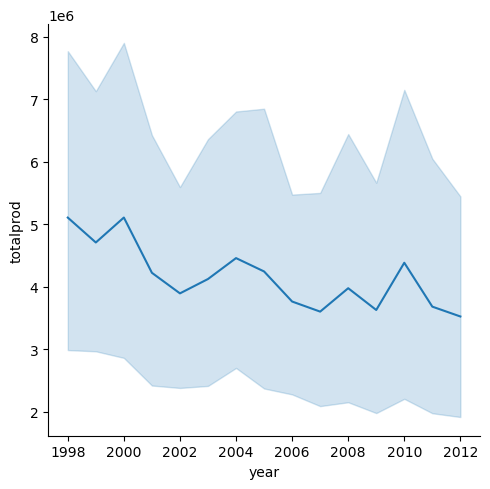

In [11]:
sns.relplot(x='year',y='totalprod',kind='line',data=honey)

Answer: Not really. If you look at total production, it actually seems to have increased in that particular year, even though generally speaking the amount of honey being produced is in decline during these years.

Question: In that case, what could have caused that spike in the price of honey around 2003?

To discover this, you can explore a facet grid.

## Facet grids

Facet grids take one facet of your dataset (in our case, you can choose 'year' to avoid having too many facets produced). Seaborn can then make a plot for each of those facets of your chosen x and y coordinates for more easy visual comparison. Does 2003 stand out in this type of comparison?

Create a facet grid by continuing to use relplot as recommended by Seaborn's documentation.



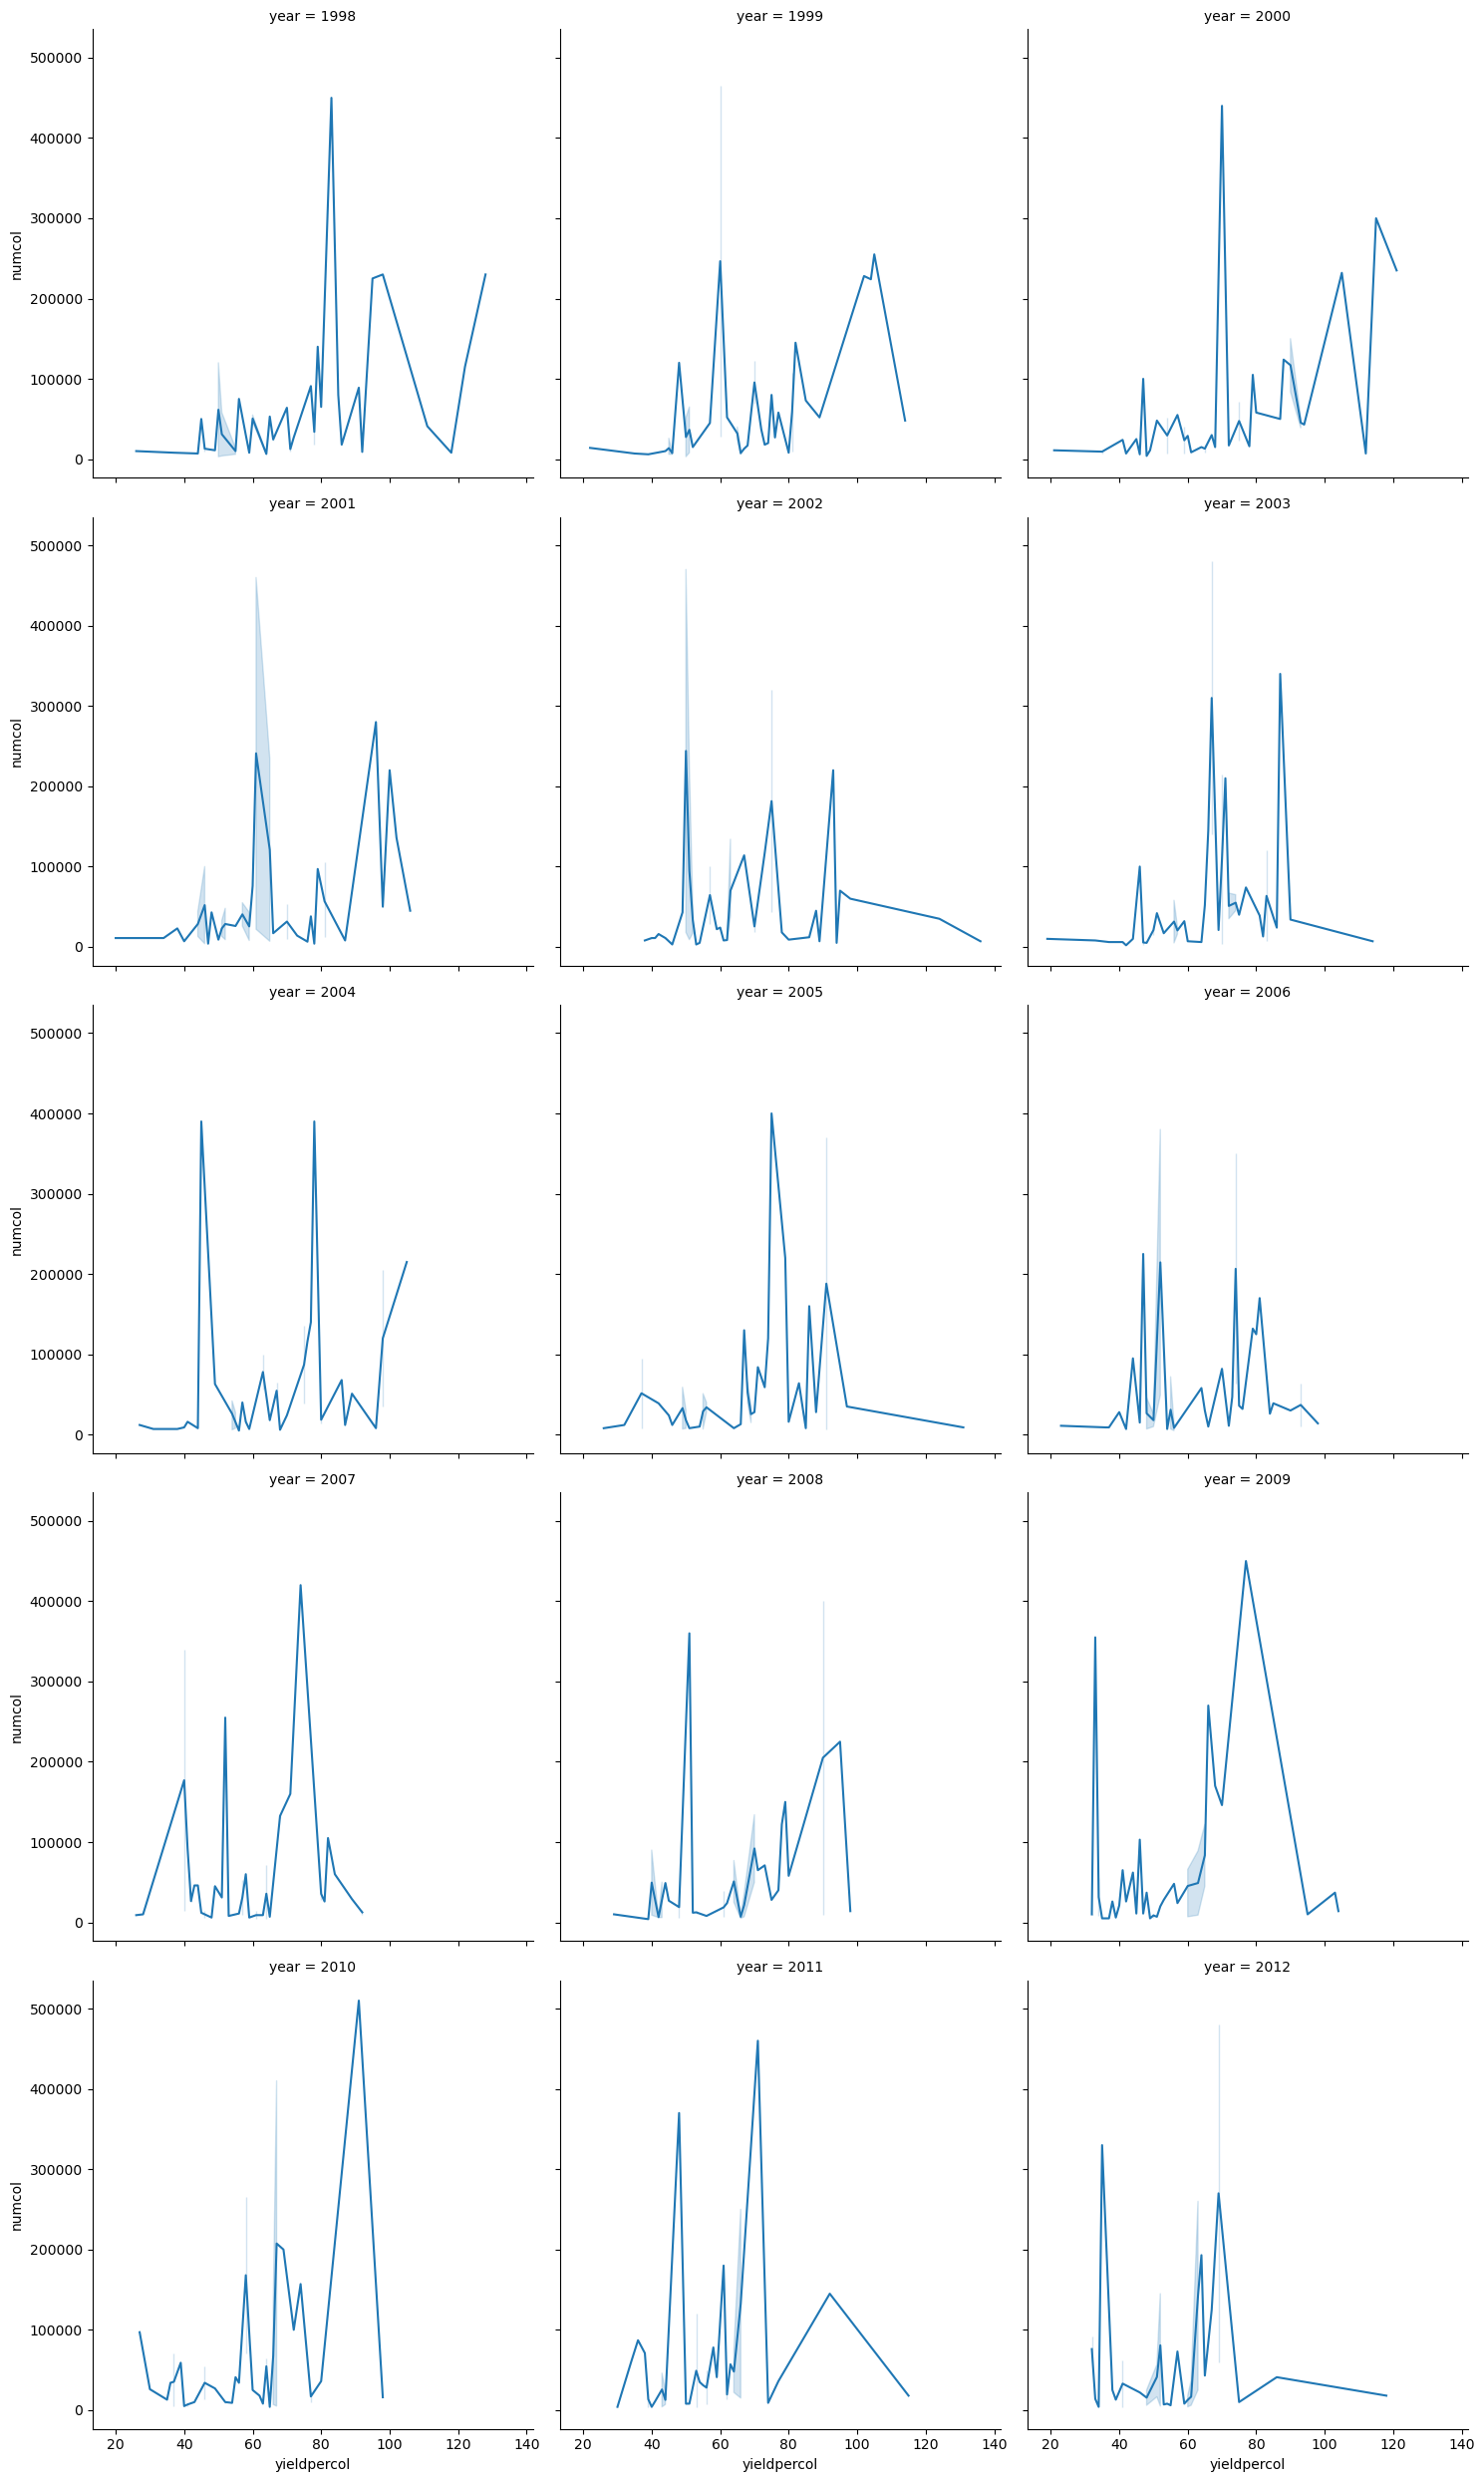

In [12]:
sns.relplot(data=honey,
            x='yieldpercol',y='numcol',
            col='year',
            col_wrap=3,
            kind='line')

This visualization compares the yield per colony and number of colonies year over year, side by side with a wrap set at 3 for the columns.

For this dataset, nothing particularly stands out with regards to the number of colonies and their yield, year over year and state over state. Is there a different way to look at finding a correlation between these two variables?



## Dual-line Plots

Try a multiline plot by superimposing two lineplots on top of each other, using Seaborn's 'despine' to remove their top and right spines, and using ax.twinx derived from Matplotlib. Twinx allows a chart to share the x axis and display two y axes. So, display the yield per colony and number of colonies, superimposed:



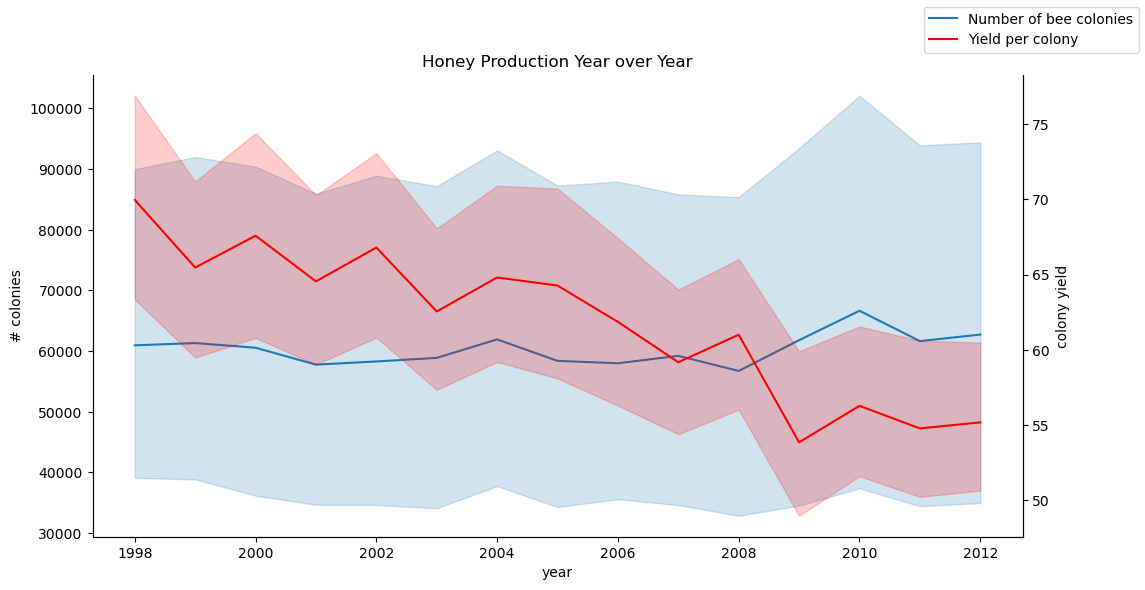

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=honey['year'], y=honey['numcol'], data=honey, 
                        label = 'Number of bee colonies', legend=False)
sns.despine()
plt.ylabel('# colonies')
plt.title('Honey Production Year over Year');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=honey['year'], y=honey['yieldpercol'], ax=ax2, color="r", 
                         label ='Yield per colony', legend=False) 
sns.despine(right=False)
plt.ylabel('colony yield')
ax.figure.legend();

While nothing jumps out to the eye around the year 2003, it does allow us to end this lesson on a little happier note: while there are overall a declining number of colonies, the number of colonies is stabilizing even if their yield per colony is decreasing.


Go, bees, go!